<a href="https://colab.research.google.com/github/ludmilaexbrayat/recognizing-packagings/blob/master/live_testing_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# General Packages

import numpy as np
import pickle
import os
import sys
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Torch Specific

import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

import torchvision
from torchvision import models,transforms,datasets

from PIL import Image

In [0]:
COLUMNS = np.array(['Barquette',	
                    'Bocal',	
                    'Boite',
                    'Bouteille',
                    'Brique',
                    'Carton',
                    'Conserve',
                    'Metal',
                    'Papier',
                    'Plastique',
                    'Pot',
                    'Sachet',
                    'Verre'])

In [0]:
!pip install -U -q PyDrive
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link_model = 'https://drive.google.com/open?id=1664MPlkLmBo__s6g8Kd3D88DQEC1tVIK'
fluff, id_model = link_model.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id_model}) 
downloaded.GetContentFile('train_model2.pt')

In [0]:
!mkdir data

In [7]:
%cd ..

/


In [0]:
#!unrar e X_sample.rar data/

In [0]:
transformer = transforms.Compose([
                # 1. Resizing the images so they all have the same format
                transforms.Resize((224,224)),
                # 2. Converting to Tensor
                transforms.ToTensor()
            ])

In [0]:
data_path = 'content/'
train_dataset = torchvision.datasets.ImageFolder(
    root=data_path,
    transform=transformer)

In [11]:
train_dataset[0]

(tensor([[[0.6235, 0.6235, 0.6235,  ..., 0.5608, 0.5686, 0.5686],
          [0.6118, 0.6157, 0.6196,  ..., 0.5765, 0.5765, 0.5725],
          [0.6118, 0.6235, 0.6235,  ..., 0.5725, 0.5725, 0.5725],
          ...,
          [0.5608, 0.5647, 0.5412,  ..., 0.6078, 0.6039, 0.6235],
          [0.5294, 0.5216, 0.5255,  ..., 0.5961, 0.6118, 0.6392],
          [0.4980, 0.5098, 0.5529,  ..., 0.6196, 0.6471, 0.6353]],
 
         [[0.6196, 0.6196, 0.6196,  ..., 0.5333, 0.5373, 0.5412],
          [0.6078, 0.6118, 0.6196,  ..., 0.5490, 0.5490, 0.5451],
          [0.6078, 0.6157, 0.6235,  ..., 0.5451, 0.5451, 0.5451],
          ...,
          [0.5529, 0.5490, 0.5216,  ..., 0.5922, 0.5922, 0.6118],
          [0.5176, 0.5020, 0.5059,  ..., 0.5804, 0.6000, 0.6275],
          [0.4784, 0.5020, 0.5412,  ..., 0.6078, 0.6353, 0.6196]],
 
         [[0.5686, 0.5765, 0.5765,  ..., 0.4549, 0.4588, 0.4627],
          [0.5647, 0.5725, 0.5804,  ..., 0.4745, 0.4745, 0.4745],
          [0.5725, 0.5843, 0.5922,  ...,

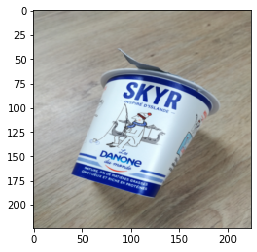

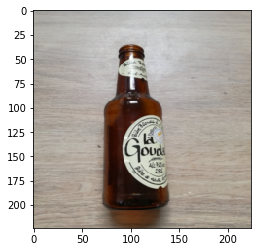

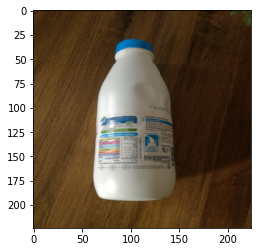

In [12]:
# Plotting an image
for index_image in range(3):
  plt.figure()
  plt.imshow(np.dstack(train_dataset[index_image][0].numpy()))
  plt.show()

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


In [14]:
model = torch.load('content/train_model2.pt')
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

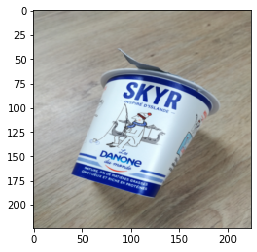


 Raw Predictions:
tensor([6.4611e-03, 2.3580e-08, 6.0050e-04, 8.0409e-03, 1.9234e-07, 9.5777e-03,
        4.2283e-06, 4.7780e-04, 2.4399e-04, 6.5200e-01, 1.7794e-03, 1.3714e-01,
        6.0395e-03], device='cuda:0', grad_fn=<SelectBackward>)

 Predicted Labels according to threshold: 
['Plastique']


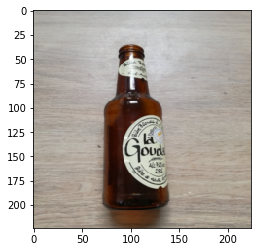


 Raw Predictions:
tensor([8.7044e-06, 8.1636e-07, 2.2715e-04, 9.9986e-01, 4.8656e-07, 4.7874e-04,
        1.0300e-08, 3.5674e-05, 5.9985e-05, 1.9713e-01, 6.7246e-06, 1.2615e-05,
        7.6586e-01], device='cuda:0', grad_fn=<SelectBackward>)

 Predicted Labels according to threshold: 
['Bouteille' 'Verre']


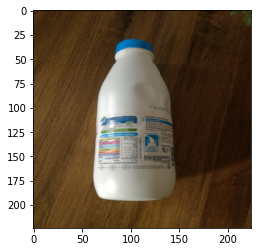


 Raw Predictions:
tensor([9.2094e-03, 2.2740e-05, 5.1474e-05, 9.8529e-01, 1.3731e-04, 2.4491e-03,
        3.5130e-08, 1.9279e-04, 4.5724e-05, 7.7530e-01, 5.5591e-04, 3.4384e-03,
        9.7919e-03], device='cuda:0', grad_fn=<SelectBackward>)

 Predicted Labels according to threshold: 
['Bouteille' 'Plastique']


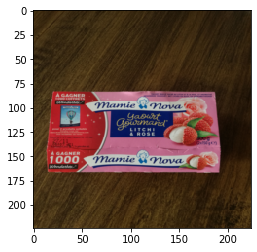


 Raw Predictions:
tensor([1.7605e-02, 4.8445e-06, 2.5315e-02, 2.9766e-05, 3.6266e-06, 4.9091e-01,
        5.4184e-05, 1.7715e-02, 1.5128e-02, 4.7221e-01, 9.4759e-03, 1.8522e-01,
        4.8803e-03], device='cuda:0', grad_fn=<SelectBackward>)

 Predicted Labels according to threshold: 
[]


In [15]:
# Plot prediction for an image

for image in train_dataset:
  image_to_device = image[0].to(device)
  plt.imshow(np.dstack(image[0].numpy()))
  plt.show()
  pred = model(image_to_device.unsqueeze(0))
  print('\n Raw Predictions:')
  print(pred[0])
  print('\n Predicted Labels according to threshold: ')
  print(COLUMNS[pred[0].cpu() >= 0.5])